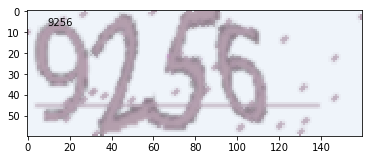

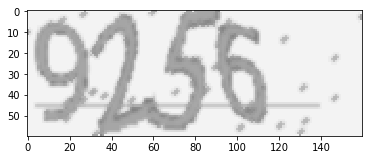

In [13]:
%matplotlib inline
from captcha.image import ImageCaptcha  # pip install captcha
import numpy as np
# to fix: could not open display of gtk
import matplotlib as mpl  # pip install matplotlib
mpl.use('Agg')

import matplotlib.pyplot as plt
from PIL import Image
import random

NUMBERS = map(str, range(10))
def random_captcha_text(char_set=NUMBERS, captcha_size=4):
        return ''.join(random.choice(char_set) for _ in range(captcha_size))

def convert2gray(img):
        if len(img.shape) > 2:
                r, g, b = img[:, :, 0], img[:, :, 1], img[:, :, 2]
                gray = 0.2989 * r + 0.5870 * g + 0.1140 * b
                return gray
        else:
                return img
            
def gen_captcha_text_and_image():
        image = ImageCaptcha()
        captcha_text = random_captcha_text()
        captcha_text = ''.join(captcha_text)
        captcha = image.generate(captcha_text)
        captcha_image = Image.open(captcha)
        captcha_image = np.array(captcha_image)
        captcha_grey_image = convert2gray(captcha_image)
        im = Image.fromarray(captcha_grey_image).convert('RGB')
        return captcha_text, captcha_image, im


text, image, im = gen_captcha_text_and_image()
f = plt.figure()
ax = f.add_subplot(111)
ax.text(0.1, 0.9,text, ha='center', va='center', transform=ax.transAxes)
plt.imshow(image)
plt.show()
plt.imshow(im)
plt.show()